In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog

In [2]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [3]:
plt.rcParams.update({'font.size': 18})
# plt.rcParams.update({'font.size': 16})

In [4]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X')

In [5]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
# ybound = 2e5
ybound = 5e5

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



depth = 0
vort20_0 = grid20.interp(grid20.interp((grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace20
strain20_0 = ((grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid20.interp(grid20.interp(grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace20

In [7]:
vortband01 = np.linspace(-7, 7, 240)
strainband01 = np.linspace(.5e-3, 7, 240)

ybound = 5e5

binbox01 =  (vortband01[1]-vortband01[0])*(strainband01[1]-strainband01[0])

vort_01_0 = (vort01_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_01_0 = (abs(strain01_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


# hist01 = histogram(vort_01_0,strain_01_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
# hist01.load()


vort_05_0 = (vort05_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_05_0 = (abs(strain05_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')

# hist05 = histogram(vort_05_0,strain_05_0,dim = ['XC','YC'], bins=[vortband01,strainband01])
# hist05.load()


vort_20_0 = (vort20_0.sel(YC = slice(ybound,2e6-ybound))/f).rename('vort1_0')
strain_20_0 = (abs(strain20_0.sel(YC = slice(ybound,2e6-ybound))/f)).rename('strain1_0')


# hist20 = histogram(vort_20_0,strain_20_0,dim = ['XC','YC'] , bins=[vortband01,strainband01])
# hist20.load()


In [8]:
hist01 = xr.open_dataarray('hist01')
hist05 = xr.open_dataarray('hist05')
hist20 = xr.open_dataarray('hist20')

In [12]:
hist01_wc100 = xr.open_dataarray('hist01_wc100')
hist05_wc150 = xr.open_dataarray('hist05_wc150')
hist20_wc180 = xr.open_dataarray('hist20_wc180')

In [28]:
depth = -100
W01_100 = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))
W01_mean = W01_100.mean(dim=['XC','YC'])
W01_prime = W01_100 - W01_mean
Tracer01_100 = ds01.PTRACER01.sel(Z=depth,method='nearest').sel(YC = slice(ybound,2e6-ybound))
Tracer01_mean = Tracer01_100.mean(dim=['XC','YC'])
Tracer01_prime = Tracer01_100 - Tracer01_mean
Wtracer01_prime = W01_prime * Tracer01_prime



depth = -150
W05_150 = grid05.interp(ds05.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))
W05_mean = W05_150.mean(dim=['XC','YC'])
W05_prime = W05_150 - W05_mean
Tracer05_150 = ds05.PTRACER01.sel(Z=depth,method='nearest').sel(YC = slice(ybound,2e6-ybound))
Tracer05_mean = Tracer05_150.mean(dim=['XC','YC'])
Tracer05_prime = Tracer05_150 - Tracer05_mean
Wtracer05_prime = W05_prime * Tracer05_prime


depth = -180
W20_180 = grid20.interp(ds20.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))
W20_mean = W20_180.mean(dim=['XC','YC'])
W20_prime = W20_180 - W20_mean
Tracer20_180 = ds20.PTRACER01.sel(Z=depth,method='nearest').sel(YC = slice(ybound,2e6-ybound))
Tracer20_mean =Tracer20_180.mean(dim=['XC','YC'])
Tracer20_prime = Tracer20_180 - Tracer20_mean
Wtracer20_prime = W20_prime * Tracer20_prime

In [31]:
wpcp_01_100 = Wtracer01_prime.rename('Wtracer1_100')
vort_01_0 = vort_01_0.chunk({'XC': 2000, 'YC': 2000})
strain_01_0 = strain_01_0.chunk({'XC': 2000, 'YC': 2000})
hab01_100_prime = histogram(vort_01_0,strain_01_0,weights=wpcp_01_100, dim = ['XC','YC'], bins=[vortband01,strainband01])


wpcp_05_150 = Wtracer05_prime.rename('Wtracer5_150')
vort_05_0 = vort_05_0.chunk({'XC': 2000, 'YC': 2000})
strain_05_0 = strain_05_0.chunk({'XC': 2000, 'YC': 2000})
hab05_150_prime = histogram(vort_05_0,strain_05_0, weights=wpcp_05_150, dim = ['XC','YC'], bins=[vortband01,strainband01])


wpcp_20_180 = Wtracer20_prime.rename('Wtracer20_180')
vort_20_0 = vort_20_0.chunk({'XC': 2000, 'YC': 2000})
strain_20_0 = strain_20_0.chunk({'XC': 2000, 'YC': 2000})
hab20_180_prime = histogram(vort_20_0,strain_20_0,weights=wpcp_20_180, dim = ['XC','YC'], bins=[vortband01,strainband01])

In [32]:
hab01_100_prime.load()
hab05_150_prime.load()
hab20_180_prime.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [33]:
hab01_100_prime.to_netcdf('hab01_wpcp')
hab05_150_prime.to_netcdf('hab05_wpcp')
hab20_180_prime.to_netcdf('hab20_wpcp')
hab05_cg_flux.to_netcdf('hab05_cg_wpcp')
hab20_cg_flux.to_netcdf('hab20_cg_wpcp')

<ipython-input-10-076430061d8a>:8: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-10-076430061d8a>:25: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp05.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
<ipython-input-10-076430061d8a>:40: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  temp20.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')


Text(0, 0.5, 'strain/$|f_0|$')

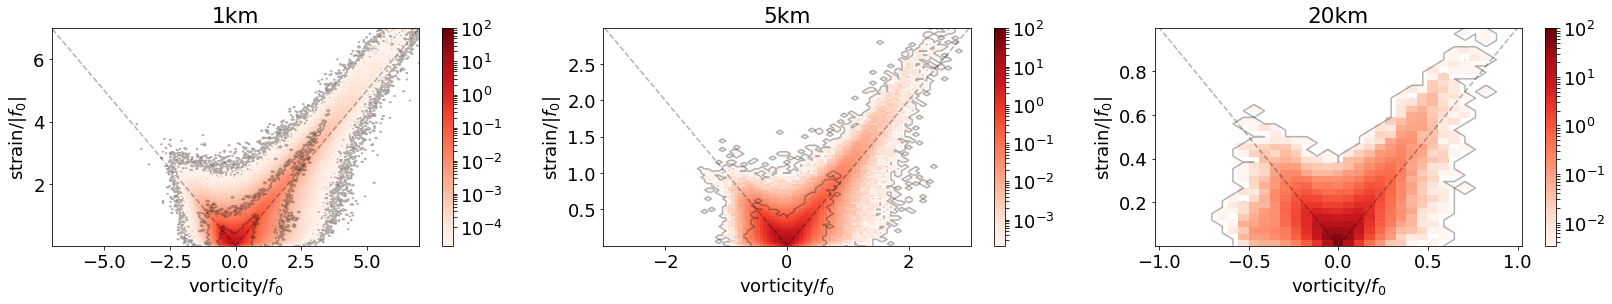

In [10]:
plt.figure(figsize=(28,4))


plt.subplot(131)
girbNums01 = len(vort_01_0.YC)*len(strain_01_0.XC)
temp = (1/(binbox01*girbNums01)*(hist01.rename('')).mean(dim='time').T)
temp = xr.where(temp<1e-5,np.nan,temp)
temp.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-7, 7, 59), np.linspace(.5e-3, 7, 59), binbox01*(1**2)*hab01_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
plt.title('1km')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*girbNums01)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-7,10),np.linspace(0,7,10),'k--',alpha=.3)
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')



plt.subplot(132)
girbNums05 = len(vort_05_0.YC)*len(strain_05_0.XC)
temp05 = (1/(binbox01*girbNums05)*(hist05.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3)))
temp05 = xr.where(temp05<1e-5,np.nan,temp05)
temp05.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*girbNums01)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=.3)
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.title('5km')
plt.plot(np.linspace(0,-3,10),np.linspace(0,3,10),'k--',alpha=.3)
plt.plot(np.linspace(0,3),np.linspace(0,3),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')



plt.subplot(133)
girbNums20 = len(vort_20_0.YC)*len(strain_20_0.XC)
temp20 = (1/(binbox01*girbNums20)*(hist20.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1)))
temp20 = xr.where(temp20<1e-5,np.nan,temp20)
temp20.plot(vmax=1e2,norm=cols.SymLogNorm(1e-4), cmap ='Reds')
# plt.contour(np.linspace(-3, 3, 49), np.linspace(.5e-3, 3, 49), binbox05*(5**2)*hab05_00.mean(dim='time').T, levels=[0.5e1,1.5e2,1e4],colors ='k')
plt.title('20km')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*girbNums01)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k',alpha=0.3)
plt.plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--',alpha=.3)
plt.plot(np.linspace(0,1),np.linspace(0,1),'k--',alpha=.3)
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')

In [13]:
depth = -100
W01_100 = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))
W01_mean = W01_100.mean(dim=['XC','YC'])
W01_prime = W01_100 - W01_mean
Tracer01_100 = ds01.PTRACER01.sel(Z=depth,method='nearest').sel(YC = slice(ybound,2e6-ybound))
Tracer01_mean = Tracer01_100.mean(dim=['XC','YC'])
Tracer01_prime = Tracer01_100 - Tracer01_mean
Wtracer01_prime = W01_prime * Tracer01_prime



depth = -150
W05_150 = grid05.interp(ds05.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))
W05_mean = W05_150.mean(dim=['XC','YC'])
W05_prime = W05_150 - W05_mean
Tracer05_150 = ds05.PTRACER01.sel(Z=depth,method='nearest').sel(YC = slice(ybound,2e6-ybound))
Tracer05_mean = Tracer05_150.mean(dim=['XC','YC'])
Tracer05_prime = Tracer05_150 - Tracer05_mean
Wtracer05_prime = W05_prime * Tracer05_prime


depth = -180
W20_180 = grid20.interp(ds20.W, 'Z', boundary='extend').sel(Z=depth, method='nearest').sel(YC = slice(ybound,2e6-ybound))
W20_mean = W20_180.mean(dim=['XC','YC'])
W20_prime = W20_180 - W20_mean
Tracer20_180 = ds20.PTRACER01.sel(Z=depth,method='nearest').sel(YC = slice(ybound,2e6-ybound))
Tracer20_mean =Tracer20_180.mean(dim=['XC','YC'])
Tracer20_prime = Tracer20_180 - Tracer20_mean
Wtracer20_prime = W20_prime * Tracer20_prime

In [14]:
wpcp01_100 = Wtracer01_prime.rename('Wtracer1_100')
vort_01_0 = vort_01_0.chunk({'XC': 2000, 'YC': 2000})
strain_01_0 = strain_01_0.chunk({'XC': 2000, 'YC': 2000})
hab01_100_prime = histogram(vort_01_0,strain_01_0,weights=wpcp01_100, dim = ['XC','YC'], bins=[vortband01,strainband01])


wpcp05_150 = Wtracer05_prime.rename('Wtracer5_150')
vort_05_0 = vort_05_0.chunk({'XC': 2000, 'YC': 2000})
strain_05_0 = strain_05_0.chunk({'XC': 2000, 'YC': 2000})
hab05_150_prime = histogram(vort_05_0,strain_05_0, weights=wpcp05_150, dim = ['XC','YC'], bins=[vortband01,strainband01])


wpcp20_180 = Wtracer20_prime.rename('Wtracer20_180')
vort_20_0 = vort_20_0.chunk({'XC': 2000, 'YC': 2000})
strain_20_0 = strain_20_0.chunk({'XC': 2000, 'YC': 2000})
hab20_180_prime = histogram(vort_20_0,strain_20_0,weights=wpcp20_180, dim = ['XC','YC'], bins=[vortband01,strainband01])

In [15]:
hab01_100_prime.load()
hab05_150_prime.load()
hab20_180_prime.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

<ipython-input-21-282ea3984df6>:4: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  ((86400*5**2)/(binbox01*2000*1000)*(hab01_100_prime.rename('')).mean(dim='time').T).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
<ipython-input-21-282ea3984df6>:17: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  ((86400*20**2)/(binbox01*2000*1000)*(hab05_150_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
<ipython-input-21-282ea3984df6>:28: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  ((86400*5**2)/(binbox01*2000*1000)*(hab20_180_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=

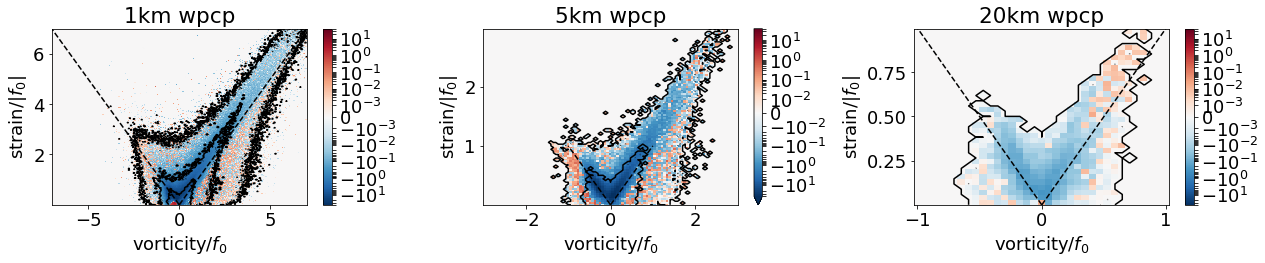

In [21]:
plt.figure(figsize=(18,4))

plt.subplot(131)
((86400*5**2)/(binbox01*2000*1000)*(hab01_100_prime.rename('')).mean(dim='time').T).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((1**2)/(binbox01*2000*1000)*hist01.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*2000*1000)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*2000*1000)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-7,10),np.linspace(0,7,10),'k--')
plt.plot(np.linspace(0,7),np.linspace(0,7),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('1km wpcp')



plt.subplot(132)
((86400*20**2)/(binbox01*2000*1000)*(hab05_150_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*2000*1000)*hist05.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*2000*1000)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--')
plt.plot(np.linspace(0,1),np.linspace(0,1),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('5km wpcp')


plt.subplot(133)
((86400*5**2)/(binbox01*2000*1000)*(hab20_180_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*2000*1000)*hist20.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-3,10),np.linspace(0,3,10),'k--')
plt.plot(np.linspace(0,3),np.linspace(0,3),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('20km wpcp')


plt.tight_layout()
# plt.savefig("./plots4/CGflux.pdf", bbox_inches = "tight")

In [9]:

# grid coarsing

temp_U = grid01.interp(ds01.U.sel(Z=0,method='nearest'),'X')
# temp_U = ds01.U.sel(Z=0,method='nearest')
U_cg = temp_U

temp_V = grid01.interp(ds01.V.sel(Z=0,method='nearest'),'Y',boundary='extend')
# temp_V = ds01.V.sel(Z=0,method='nearest')
V_cg = temp_V


temp_W = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=-100, method='nearest')
temp_W = temp_W - temp_W.sel(YC = slice(ybound,2e6-ybound)).mean(dim=['XC','YC'])
W_cg = temp_W


temp_Tracer = ds01.PTRACER01.sel(Z=-100,method='nearest')
temp_Tracer = temp_Tracer - temp_Tracer.sel(YC = slice(ybound,2e6-ybound)).mean(dim=['XC','YC'])
tracer_cg = temp_Tracer


kil = 3

for i in range(1,kil):
    U_cg = (temp_U.shift(XC=i) + temp_U.shift(XC=-i) + temp_U.shift(YC=i) + temp_U.shift(YC=-i) + U_cg)
    V_cg = (temp_V.shift(XC=i) + temp_V.shift(XC=-i) + temp_V.shift(YC=i) + temp_V.shift(YC=-i) + V_cg)
    W_cg = (temp_W.shift(XC=i) + temp_W.shift(XC=-i) + temp_W.shift(YC=i) + temp_W.shift(YC=-i) + W_cg)
    tracer_cg = (temp_Tracer.shift(XC=i) + temp_Tracer.shift(XC=-i) + temp_Tracer.shift(YC=i) + temp_Tracer.shift(YC=-i) + tracer_cg)




U_cg = U_cg/(4*(kil-1)+1)
V_cg = V_cg/(4*(kil-1)+1)
W_cg = W_cg/(4*(kil-1)+1)
tracer_cg = tracer_cg/(4*(kil-1)+1)

In [10]:
U_cg2 = U_cg[:,::5,::5]
V_cg2 = V_cg[:,::5,::5]
W_cg2 = W_cg[:,::5,::5]
tracer_cg2 = tracer_cg[:,::5,::5]

In [11]:
U_cg3 = xr.DataArray(U_cg2.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
V_cg3 = xr.DataArray(V_cg2.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
W_cg3 = xr.DataArray(W_cg2.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])
tracer_cg3 = xr.DataArray(tracer_cg2.values, coords=[ds05.time.values,ds05.YC.values,ds05.XC.values], dims=['time','YC','XC'])


In [12]:
grid05_cg = Grid(ds05.isel(XC=slice(1+1,400-1),XG=slice(1+1,400-1),YC=slice(1+1,400-1),YG=slice(1+1,400-1)), periodic='X')

In [13]:
U_cg3 = U_cg3.isel(XC=slice(1+1,400-1),YC=slice(1+1,400-1))
V_cg3 = V_cg3.isel(XC=slice(1+1,400-1),YC=slice(1+1,400-1))
W_cg3 = W_cg3.isel(XC=slice(1+1,400-1),YC=slice(1+1,400-1))
tracer_cg3 = tracer_cg3.isel(XC=slice(1+1,400-1),YC=slice(1+1,400-1))

In [14]:
vort05_cg = (grid05_cg.interp(grid05_cg.diff(V_cg3, 'X'),'X') - 
             grid05_cg.interp(grid05_cg.diff(U_cg3, 'Y', boundary='extend'),'Y', boundary='extend'))/horispace05

strain05_cg = ((grid05_cg.interp(grid05_cg.diff(V_cg3, 'X'),'X')+grid05_cg.interp(grid05_cg.diff(U_cg3, 'Y', boundary='extend'),'Y', boundary='extend'))**2 
              + (grid05_cg.interp(grid05_cg.diff(U_cg3, 'X'),'X') - grid05_cg.interp(grid05_cg.diff(V_cg3, 'Y', boundary='extend'),'Y', boundary='extend'))**2)**(0.5)/horispace05

In [15]:
vort05_cg = (vort05_cg/f).sel(YC = slice(ybound,2e6-ybound)).rename('vort1_0')
strain05_cg = (abs(strain05_cg/f)).sel(YC = slice(ybound,2e6-ybound)).rename('strain1_0')
wc05_cg = (W_cg3*tracer_cg3).sel(YC = slice(ybound,2e6-ybound)).rename('wtracer1_0')

In [16]:
hab05_cg = histogram(vort05_cg,strain05_cg,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab05_cg.load()

hab05_cg_flux = histogram(vort05_cg,strain05_cg,weights=wc05_cg, dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab05_cg_flux.load()

<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 36010 days 06:00:00 ... 36350 days ...
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [17]:

# grid coarsing 1km->20km

temp_U = grid01.interp(ds01.U.sel(Z=0,method='nearest'),'X')
# temp_U = ds01.U.sel(Z=0,method='nearest')
U_cg = temp_U

temp_V = grid01.interp(ds01.V.sel(Z=0,method='nearest'),'Y',boundary='extend')
# temp_V = ds01.V.sel(Z=0,method='nearest')
V_cg = temp_V


temp_W = grid01.interp(ds01.W, 'Z', boundary='extend').sel(Z=-100, method='nearest')
temp_W = temp_W - temp_W.sel(YC = slice(ybound,2e6-ybound)).mean(dim=['XC','YC'])
W_cg = temp_W


temp_Tracer = ds01.PTRACER01.sel(Z=-100,method='nearest')
temp_Tracer = temp_Tracer - temp_Tracer.sel(YC = slice(ybound,2e6-ybound)).mean(dim=['XC','YC'])
tracer_cg = temp_Tracer


kil = 11

for i in range(1,kil):
    U_cg = (temp_U.shift(XC=i) + temp_U.shift(XC=-i) + temp_U.shift(YC=i) + temp_U.shift(YC=-i) + U_cg)
    V_cg = (temp_V.shift(XC=i) + temp_V.shift(XC=-i) + temp_V.shift(YC=i) + temp_V.shift(YC=-i) + V_cg)
    W_cg = (temp_W.shift(XC=i) + temp_W.shift(XC=-i) + temp_W.shift(YC=i) + temp_W.shift(YC=-i) + W_cg)
    tracer_cg = (temp_Tracer.shift(XC=i) + temp_Tracer.shift(XC=-i) + temp_Tracer.shift(YC=i) + temp_Tracer.shift(YC=-i) + tracer_cg)




U_cg = U_cg/(4*(kil-1)+1)
V_cg = V_cg/(4*(kil-1)+1)
W_cg = W_cg/(4*(kil-1)+1)
tracer_cg = tracer_cg/(4*(kil-1)+1)

In [18]:
U_cg20 = U_cg[:,::20,::20]
V_cg20 = V_cg[:,::20,::20]
W_cg20 = W_cg[:,::20,::20]
tracer_cg20 = tracer_cg[:,::20,::20]

In [19]:
U_cg4 = xr.DataArray(U_cg20.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
V_cg4 = xr.DataArray(V_cg20.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
W_cg4 = xr.DataArray(W_cg20.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])
tracer_cg4 = xr.DataArray(tracer_cg20.values, coords=[ds20.time.values,ds20.YC.values,ds20.XC.values], dims=['time','YC','XC'])


In [20]:
grid20_cg = Grid(ds20.isel(XC=slice(1+1,100-1),XG=slice(1+1,100-1),YC=slice(1+1,100-1),YG=slice(1+1,100-1)), periodic='X')

In [21]:
U_cg4 = U_cg4.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
V_cg4 = V_cg4.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
W_cg4 = W_cg4.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))
tracer_cg4 = tracer_cg4.isel(XC=slice(1+1,100-1),YC=slice(1+1,100-1))

In [25]:
vort20_cg = (grid20_cg.interp(grid20_cg.diff(V_cg4, 'X'),'X') - 
             grid20_cg.interp(grid20_cg.diff(U_cg4, 'Y', boundary='extend'),'Y', boundary='extend'))/horispace20

strain20_cg = ((grid20_cg.interp(grid20_cg.diff(V_cg4, 'X'),'X')+grid20_cg.interp(grid20_cg.diff(U_cg4, 'Y', boundary='extend'),'Y', boundary='extend'))**2 
              + (grid20_cg.interp(grid20_cg.diff(U_cg4, 'X'),'X') - grid20_cg.interp(grid20_cg.diff(V_cg4, 'Y', boundary='extend'),'Y', boundary='extend'))**2)**(0.5)/horispace20

In [26]:
vort20_cg = (vort20_cg/f).sel(YC = slice(ybound,2e6-ybound)).rename('vort1_0')
strain20_cg = (abs(strain20_cg/f)).sel(YC = slice(ybound,2e6-ybound)).rename('strain1_0')
wc20_cg = (W_cg4*tracer_cg4).sel(YC = slice(ybound,2e6-ybound)).rename('wtracer1_0')

hab20_cg = histogram(vort20_cg, strain20_cg,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab20_cg.load()

hab20_cg_flux = histogram(vort20_cg, strain20_cg, weights=wc20_cg,dim = ['XC','YC'] , bins=[vortband01,strainband01])
hab20_cg_flux.load()


<xarray.DataArray 'histogram_vort1_0_strain1_0' (time: 35, vort1_0_bin: 239, strain1_0_bin: 239)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time           (time) timedelta64[ns] 79210 days 79220 days ... 79550 days
  * vort1_0_bin    (vort1_0_bin) float64 -6.971 -6.912 -6.854 ... 6.912 6.971
  * strain1_0_bin  (strain1_0_bin) float64 0.01514 0.04443 ... 6.956 6.985

In [39]:
hab01_00 = hist01
hab05_00 = hist05
hab20_00 = hist20

<ipython-input-36-44d7abd48178>:4: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  ((86400*5**2)/(binbox01*2000**2)*(hab05_150_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
<ipython-input-36-44d7abd48178>:17: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  ((86400*20**2)/(binbox01*2000**2)*(hab20_180_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
<ipython-input-36-44d7abd48178>:27: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  ((86400*5**2)/(binbox01*2000**2)*(hab05_cg_flux.rename('')).mean(dim='

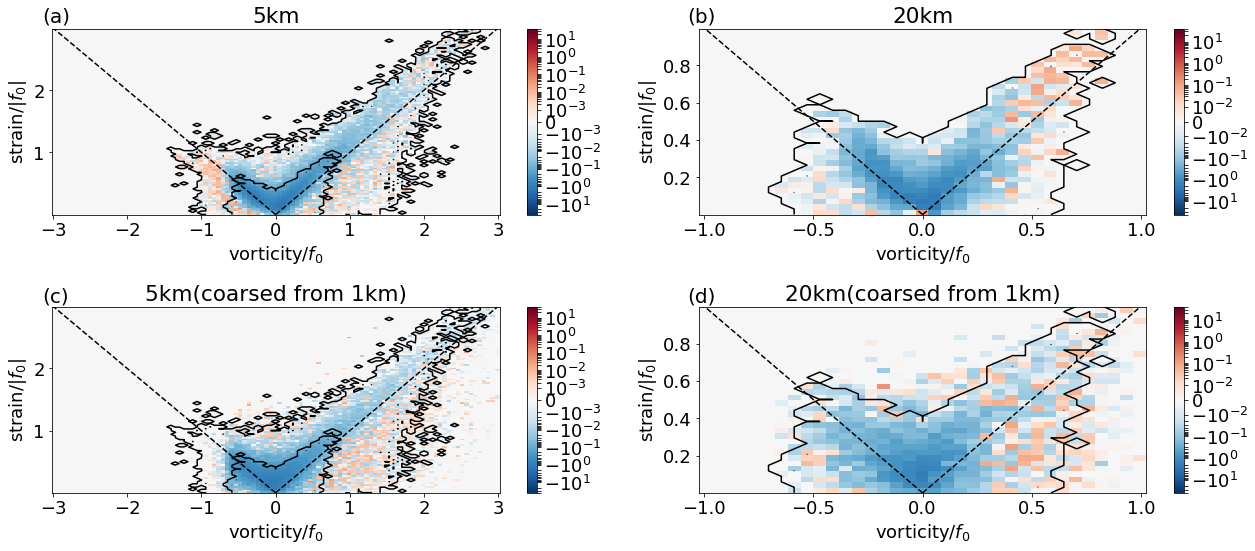

In [36]:
plt.figure(figsize=(18,8))

plt.subplot(221)
((86400*5**2)/(binbox01*2000**2)*(hab05_150_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*2000**2)*hab05_00.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*2000**2)*hab20_00.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-3,10),np.linspace(0,3,10),'k--')
plt.plot(np.linspace(0,3),np.linspace(0,3),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('5km')
plt.gcf().text(0.042, 0.94, '(a)', fontsize=20)



plt.subplot(222)
((86400*20**2)/(binbox01*2000**2)*(hab20_180_prime.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((20**2)/(binbox01*2000**2)*hab20_00.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--')
plt.plot(np.linspace(0,1),np.linspace(0,1),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('20km')
plt.gcf().text(0.54, 0.94, '(b)', fontsize=20)

plt.subplot(223)
((86400*5**2)/(binbox01*2000**2)*(hab05_cg_flux.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-3,3),strain1_0_bin=slice(.5e-3, 3))).plot(vmax=40,norm=cols.SymLogNorm(1e-3), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((5**2)/(binbox01*2000**2)*hab05_00.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239),((20**2)/(binbox01*2000**2)*hab20_00.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-3,10),np.linspace(0,3,10),'k--')
plt.plot(np.linspace(0,3),np.linspace(0,3),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('5km(coarsed from 1km)')
plt.gcf().text(0.042, 0.454, '(c)', fontsize=20)


plt.subplot(224)
((86400*20**2)/(binbox01*2000**2)*(hab20_cg_flux.rename('')).mean(dim='time').T.sel(vort1_0_bin=slice(-1,1),strain1_0_bin=slice(.5e-3, 1))).plot(vmax=40,norm=cols.SymLogNorm(1e-2), cmap ='RdBu_r')
plt.contour(np.linspace(-7, 7, 239), np.linspace(.5e-3, 7, 239), ((20**2)/(binbox01*2000**2)*hab20_00.mean(dim='time').T), levels=[1e-5],colors ='k')
plt.plot(np.linspace(0,-1,29),np.linspace(0,1,29),'k--')
plt.plot(np.linspace(0,1),np.linspace(0,1),'k--')
plt.xlabel('vorticity/$f_0$')
plt.ylabel('strain/$|f_0|$')
plt.title('20km(coarsed from 1km)')
plt.gcf().text(0.54, 0.454, '(d)', fontsize=20)

plt.tight_layout()
# plt.savefig("./plots4/CGflux.pdf", bbox_inches = "tight")

In [37]:
setNum = 80

In [40]:
refer1 = ((1**2)/(binbox01*2000*1000)*hab01_00)
pgrid1 = np.logspace(np.log10(refer1.max()),-5,setNum)

verflux5_1 = []
verflux5_cg = []
verflux20_1 = []
verflux20_cg = []
verflux1 = []
verProb1 = []

for i in range(setNum):
    
    mask_pr1 = xr.where(refer1<pgrid1[i],0,1)
    verflux1.append( (1000**2*hab01_100_prime*mask_pr1).mean(dim='time').sum() )
    verProb1.append((refer1*mask_pr1*binbox01).mean(dim='time').sum())
    verflux5_1.append( ((1000**2*25*hab05_150_prime.mean(dim='time'))*mask_pr1.mean(dim='time')).sum() )
    verflux5_cg.append( ((1000**2*25*hab05_cg_flux.mean(dim='time'))*mask_pr1.mean(dim='time')).sum() )
    verflux20_1.append( (1000**2*400*hab20_180_prime.mean(dim='time')*mask_pr1.mean(dim='time')).sum() )
    verflux20_cg.append( (1000**2*400*hab20_cg_flux.mean(dim='time')*mask_pr1.mean(dim='time')).sum() )


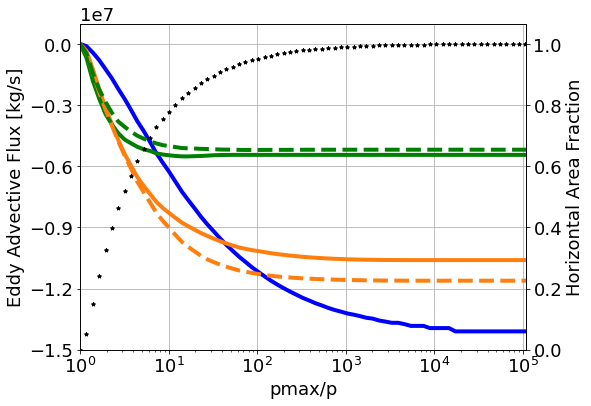

In [141]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_xlabel('pmax/p')
ax1.set_ylabel('Eddy Advective Flux [kg/s]')

ax1.plot((refer1.max().values)*(1/pgrid1),verflux1, color='b', linewidth = 4)
ax1.plot((refer1.max().values)*(1/pgrid1),verflux5_1, color='C1', linewidth = 4)
ax1.plot((refer1.max().values)*(1/pgrid1),verflux20_1,'g', linewidth = 4)
ax1.plot((refer1.max().values)*(1/pgrid1),verflux5_cg,'C1--', linewidth = 4)
ax1.plot((refer1.max().values)*(1/pgrid1),verflux20_cg,'g--', linewidth = 4)
# ax1.plot((refer1.max().values)*(1/pgrid1[50])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
# ax1.plot((refer1.max().values)*(1/pgrid1[24])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
ax1.set_xscale('log')
ax1.set_ylim((-1.5e7,0.1e7))
ax1.set_xlim((1,1e5+1e4))
ax1.set_yticks([-1.5e7, -1.2e7,  -.9e7,  -.6e7,  -.3e7, 0])
ax1.grid()
# ax1.legend(['1km','5km','20km','5km(coarsed)','20km(coarsed)'],loc = 'best')

ax2 = ax1.twinx() 
ax2.set_ylabel('Horizontal Area Fraction')
ax2.plot((refer1.max().values)*(1/pgrid1),verProb1,'k*',markersize = 4)
ax2.set_ylim((0,1.067))
ax2.set_yticks([0., 0.2, 0.4, 0.6, .8, 1])
plt.savefig('./6.2.pdf')

In [67]:
hab01_Diff50_mean = xr.open_dataarray('hab01_Diff50_mean')
hab01_1SF_mean = xr.open_dataarray('hab01_1SF_mean')

In [113]:
refer1 = ((1**2)/(binbox01*2000*1000)*hab01_00)
pgrid1 = np.logspace(np.log10(refer1.max()),-5,setNum)

verDiff_1 = []
verSuf_1 = []
verflux1 = []
verProb1 = []

for i in range(setNum):
    
    mask_pr1 = xr.where(refer1<pgrid1[i],0,1)
    verflux1.append( (1000**2*hab01_100_prime*mask_pr1).mean(dim='time').sum() )
    verProb1.append((refer1*mask_pr1*binbox01).mean(dim='time').sum())
    verSuf_1.append( (-1000**2*hab01_1SF_mean*mask_pr1).mean(dim='time').sum() )
    verDiff_1.append( (hab01_Diff50_mean*mask_pr1).mean(dim='time').sum() )



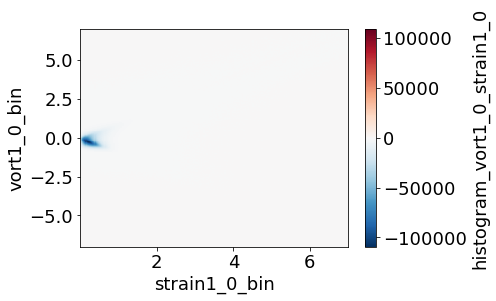

In [69]:
hab01_Diff50_mean.plot()

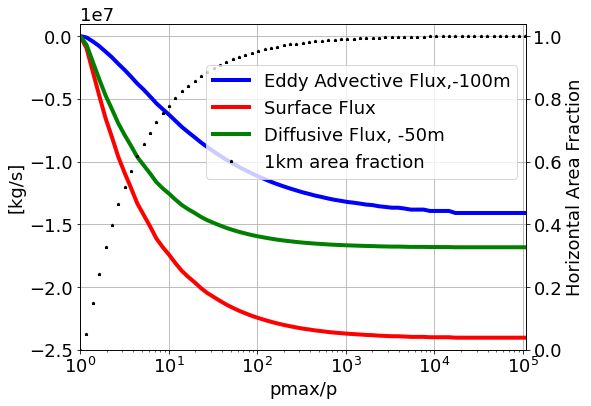

In [143]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_xlabel('pmax/p')
ax1.set_ylabel('[kg/s]')

ln1 =ax1.plot((refer1.max().values)*(1/pgrid1),verflux1, color='b', linewidth = 4)
ln2 =ax1.plot((refer1.max().values)*(1/pgrid1),verSuf_1, color='r', linewidth = 4)
ln3 =ax1.plot((refer1.max().values)*(1/pgrid1),verDiff_1, color='g', linewidth = 4)
# ax1.plot((refer1.max().values)*(1/pgrid1[50])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
# ax1.plot((refer1.max().values)*(1/pgrid1[24])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
ax1.set_xscale('log')
ax1.set_ylim((-2.5e7,0.1e7))
ax1.set_xlim((1,1e5+1e4))
ax1.set_yticks([-2.5e7, -2e7,  -1.5e7,  -1e7,  -.5e7, 0])
ax1.grid()
# ax1.legend(['1km','5km','20km','5km(coarsed)','20km(coarsed)'],loc = 'best')

ax2 = ax1.twinx() 
ax2.set_ylabel('Horizontal Area Fraction')
ln4 = ax2.plot((refer1.max().values)*(1/pgrid1),verProb1,'k*',markersize = 3)
ax2.set_ylim((0,1.04))
ax2.set_yticks([0., 0.2, 0.4, 0.6, .8, 1])
# plt.savefig('./6.2.pdf')


lnt = ln1+ln2+ln3+ln4
ax2.legend(lnt,['Eddy Advective Flux,-100m','Surface Flux','Diffusive Flux, -50m','1km area fraction'],bbox_to_anchor=(1, 0.9), loc = 'upper right')
plt.savefig('./6.3.pdf')

In [114]:
verflux1Max = verflux1[-1].values
verSuf_1Max = verSuf_1[-1].values
verDiff_1Max = verDiff_1[-1].values

In [112]:
verflux1flat = [vf.values/verflux1Max for vf in verflux1]

In [115]:
verSufflat = [vf.values/verSuf_1Max for vf in verSuf_1]
verDifflat = [vf.values/verDiff_1Max for vf in verDiff_1]

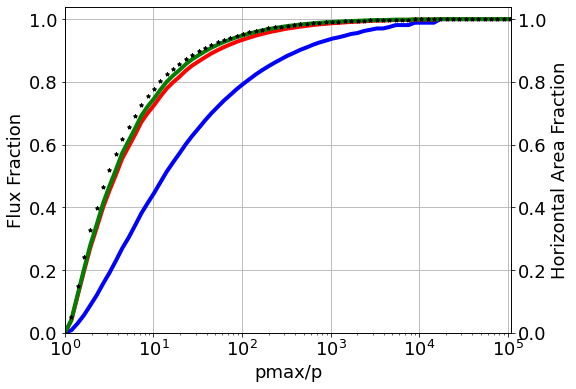

In [142]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_xlabel('pmax/p')
ax1.set_ylabel('Flux Fraction')

ln1 =ax1.plot((refer1.max().values)*(1/pgrid1),verflux1flat, color='b', linewidth = 4)
ln2 =ax1.plot((refer1.max().values)*(1/pgrid1),verSufflat, color='r', linewidth = 4)
ln3 =ax1.plot((refer1.max().values)*(1/pgrid1),verDifflat, color='g', linewidth = 4)
# ax1.plot((refer1.max().values)*(1/pgrid1[50])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
# ax1.plot((refer1.max().values)*(1/pgrid1[24])+np.linspace(-15,30,20)*0,np.linspace(-2e7,3e7,20),'k',clip_on=False,alpha = .5)
ax1.set_xscale('log')
ax1.set_xlim((1,1e5+1e4))
ax1.set_ylim((0,1.04))
ax1.set_yticks([0., 0.2, 0.4, 0.6, .8, 1])
ax1.grid()
# ax1.legend(['1km','5km','20km','5km(coarsed)','20km(coarsed)'],loc = 'best')

ax2 = ax1.twinx() 
ax2.set_ylabel('Horizontal Area Fraction')
ln4 = ax2.plot((refer1.max().values)*(1/pgrid1),verProb1,'k*',markersize = 4)
ax2.set_ylim((0,1.04))
ax2.set_yticks([0., 0.2, 0.4, 0.6, .8, 1])
# plt.savefig('./6.2.pdf')


lnt = ln1+ln2+ln3+ln4
# ax2.legend(lnt,['W\'C\',-100m','Surface Flux','Diffusive Flux, -50m','1km area faction'],loc = 'right')
plt.savefig('./6.4.pdf')

In [48]:
ax2.get_yticks()

array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2])

In [49]:
ax1.get_yticks()

array([-16000000., -14000000., -12000000., -10000000.,  -8000000.,
        -6000000.,  -4000000.,  -2000000.,         0.,   2000000.])